In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
customers = pd.read_csv("customers_data.csv")
products = pd.read_csv("products_data.csv")
transactions = pd.read_csv("transactions_data.csv")


In [12]:
#Validate Dataset Loading
customers.head()
customers.info()
customers.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      90 non-null     float64
 1   Company_Name    100 non-null    object 
 2   Company_Profit  88 non-null     float64
 3   Address         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB


,Company_ID,Company_Name,Company_Profit,Address
count,90.000000,100,88.000000,100
unique,NaN,100,NaN,97
top,NaN,Tech Enterprises 1,NaN,"Katipunan Ave, Barangay 123, Mandaluyong, Phil..."
freq,NaN,1,NaN,2
mean,51.944444,NaN,76400.500000,NaN
std,28.684397,NaN,27296.169253,NaN
min,1.000000,NaN,30663.000000,NaN
25%,27.500000,NaN,52648.500000,NaN
50%,53.500000,NaN,75301.500000,NaN
75%,76.750000,NaN,101089.750000,NaN


In [4]:
products.head()
products.info()
products.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     18 non-null     float64
 1   Product_Name   20 non-null     object 
 2   Product_Price  20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes


,Product_ID,Product_Name,Product_Price
count,18.000000,20,20
unique,NaN,20,16
top,NaN,FinPredictor Suite,"?168,000"
freq,NaN,1,2
mean,10.333333,NaN,NaN
std,6.077925,NaN,NaN
min,1.000000,NaN,NaN
25%,5.250000,NaN,NaN
50%,10.500000,NaN,NaN
75%,14.750000,NaN,NaN


In [5]:
transactions.head()
transactions.info()
transactions.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9000 non-null   float64
 1   Transaction_ID    9000 non-null   float64
 2   Company_ID        9000 non-null   float64
 3   Product_ID        9000 non-null   float64
 4   Quantity          9000 non-null   float64
 5   Transaction_Date  10000 non-null  object 
 6   Product_Price     9000 non-null   float64
 7   Total_Cost        9000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB


,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,10000,9000.000000,9.000000e+03
unique,NaN,NaN,NaN,NaN,NaN,4812,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,2021/02/21,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
mean,4994.049111,5005.177556,50.583556,10.446778,10.528778,NaN,134652.802537,1.424246e+06
std,2885.331476,2894.971964,28.900870,5.768341,5.808062,NaN,39058.106978,9.086274e+05
min,0.000000,1.000000,1.000000,1.000000,0.000000,NaN,75613.362923,8.400000e+04
25%,2501.750000,2491.750000,25.000000,5.000000,6.000000,NaN,100686.369472,6.720000e+05
50%,4997.500000,5005.000000,50.000000,10.000000,11.000000,NaN,131297.783516,1.344000e+06
75%,7477.250000,7527.250000,76.000000,15.000000,16.000000,NaN,162221.485713,1.965600e+06


In [14]:
#Exploratory Data Analysis (EDA)
#Check for Missing Values

customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


Unnamed: 0          1000
Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity            1000
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64

In [15]:
#Check Data Types
customers.dtypes
products.dtypes
transactions.dtypes


Unnamed: 0          float64
Transaction_ID      float64
Company_ID          float64
Product_ID          float64
Quantity            float64
Transaction_Date     object
Product_Price       float64
Total_Cost          float64
dtype: object

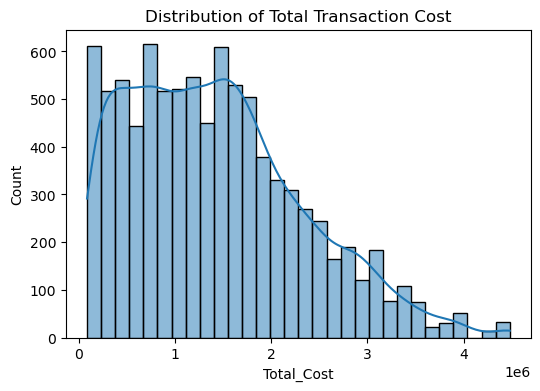

In [16]:
#Visualize Transaction Amount Distribution

plt.figure(figsize=(6,4))
sns.histplot(transactions['Total_Cost'], bins=30, kde=True)
plt.title("Distribution of Total Transaction Cost")
plt.show()


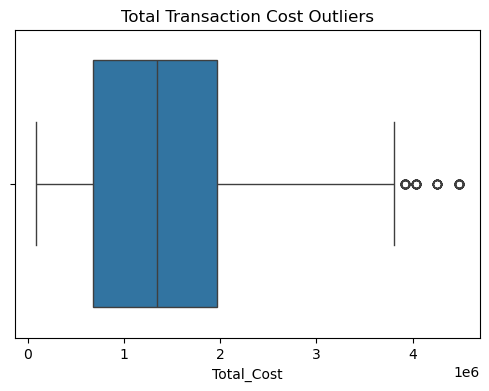

In [17]:
#Detect Outliers Using Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x=transactions['Total_Cost'])
plt.title("Total Transaction Cost Outliers")
plt.show()


In [21]:
#Data Preprocessing
#Handle Missing Values

# Categorical columns
cat_cols_customers = customers.select_dtypes(include='object').columns
cat_cols_products = products.select_dtypes(include='object').columns
cat_cols_transactions = transactions.select_dtypes(include='object').columns

# Numerical columns
num_cols_transactions = transactions.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values
customers[cat_cols_customers] = customers[cat_cols_customers].fillna("Unknown")
products[cat_cols_products] = products[cat_cols_products].fillna("Unknown")
transactions[cat_cols_transactions] = transactions[cat_cols_transactions].fillna("Unknown")
transactions[num_cols_transactions] = transactions[num_cols_transactions].fillna(0)

In [23]:
transactions['Transaction_Date'] = pd.to_datetime(
    transactions['Transaction_Date'], errors='coerce'
)


In [24]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


In [25]:
# Check missing values in each dataset
print("Customers Missing Values:\n", customers.isnull().sum())
print("\nProducts Missing Values:\n", products.isnull().sum())
print("\nTransactions Missing Values:\n", transactions.isnull().sum())


Customers Missing Values:
 Company_ID        0
Company_Name      0
Company_Profit    0
Address           0
dtype: int64

Products Missing Values:
 Product_ID       0
Product_Name     0
Product_Price    0
dtype: int64

Transactions Missing Values:
 Unnamed: 0             0
Transaction_ID         0
Company_ID             0
Product_ID             0
Quantity               0
Transaction_Date    7480
Product_Price          0
Total_Cost             0
dtype: int64


In [27]:
print("Customers Dataset Preview:")
display(customers.head())

print("Products Dataset Preview:")
display(products.head())

print("Transactions Dataset Preview:")
display(transactions.head())


Customers Dataset Preview:


,Company_ID,Company_Name,Company_Profit,Address
0,1.0,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2.0,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4.0,Prime Network 4,Unknown,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"


Products Dataset Preview:


,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,"?140,000"
1,2.0,MarketMinder Analytics,"?168,000"
2,3.0,TrendWise Forecaster,"?100,800"
3,4.0,CustomerScope Insights,"?123,200"
4,5.0,SalesSync Optimizer,"?84,000"


Transactions Dataset Preview:


,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,Unknown,2024-03-26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,NaT,97930.99338,1428000.0
2,2.0,Unknown,28.0,18.0,6.0,NaT,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,NaT,Unknown,1008000.0
4,4.0,5.0,47.0,3.0,8.0,NaT,99575.609634,705600.0


In [28]:
print("Customers Data Types:\n", customers.dtypes)
print("\nProducts Data Types:\n", products.dtypes)
print("\nTransactions Data Types:\n", transactions.dtypes)


Customers Data Types:
 Company_ID        object
Company_Name      object
Company_Profit    object
Address           object
dtype: object

Products Data Types:
 Product_ID       object
Product_Name     object
Product_Price    object
dtype: object

Transactions Data Types:
 Unnamed: 0                  object
Transaction_ID              object
Company_ID                  object
Product_ID                  object
Quantity                    object
Transaction_Date    datetime64[ns]
Product_Price               object
Total_Cost                 float64
dtype: object


In [29]:
print("Transactions Summary Statistics:")
display(transactions.describe())


Transactions Summary Statistics:


,Transaction_Date,Total_Cost
count,2520,1.000000e+04
mean,2022-10-22 12:40:00.000000256,1.281822e+06
min,2020-10-29 00:00:00,0.000000e+00
25%,2021-10-24 00:00:00,4.928000e+05
50%,2022-10-28 12:00:00,1.176000e+06
75%,2023-10-17 00:00:00,1.881600e+06
max,2024-10-28 00:00:00,4.480000e+06
std,NaN,9.620895e+05


In [30]:
print("Unique values in Customers categorical columns:")
for col in customers.select_dtypes(include='object').columns:
    print(col, ":", customers[col].unique()[:5])  # first 5 unique values

print("\nUnique values in Products categorical columns:")
for col in products.select_dtypes(include='object').columns:
    print(col, ":", products[col].unique()[:5])


Unique values in Customers categorical columns:
Company_ID : [1.0 2.0 3.0 4.0 5.0]
Company_Name : ['Tech  Enterprises  1' 'Global  Partners  2' 'Quantum Associates 3'
 'Prime Network 4' 'Elite  Ventures  5']
Company_Profit : [80701.0 80511.0 110664.0 'Unknown' 69427.0]
Address : ['EDSA, Barangay 606, Pasig, Philippines'
 'Commonwealth Ave, Barangay 789, Taguig, Philippines'
 'Roxas Blvd, Barangay 505, Pasig, Philippines'
 'Alabang-Zapote Rd, Barangay 202, Taguig, Philippines'
 'Ayala Avenue, Barangay 101, Makati, Philippines']

Unique values in Products categorical columns:
Product_ID : [1.0 2.0 3.0 4.0 5.0]
Product_Name : ['FinPredictor Suite' 'MarketMinder Analytics' 'TrendWise Forecaster'
 'CustomerScope Insights' 'SalesSync Optimizer']
Product_Price : ['?140,000' '?168,000' '?100,800' '?123,200' '?84,000']


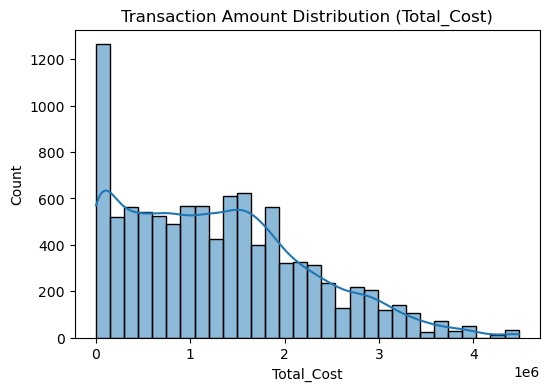

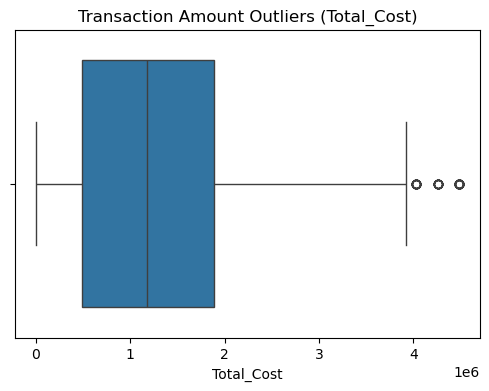

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(transactions['Total_Cost'], bins=30, kde=True)
plt.title("Transaction Amount Distribution (Total_Cost)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=transactions['Total_Cost'])
plt.title("Transaction Amount Outliers (Total_Cost)")
plt.show()

In [33]:
data = transactions.merge(customers, on='Company_ID', how='left')
data = data.merge(products, on='Product_ID', how='left')

data.head()


,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price_x,Total_Cost,Company_Name,Company_Profit,Address,Product_Name,Product_Price_y
0,0.0,1.0,88.0,6.0,Unknown,2024-03-26,194379.147964,1075200.0,Elite Consulting 88,75950.0,"EDSA, Barangay 456, Taguig, Philippines",RevenueVue Dashboard,"?179,200"
1,1.0,2.0,29.0,19.0,16.0,NaT,97930.99338,1428000.0,Sky Industries 29,61952.0,"Edsa, brgy. 606, makati, philippines!",EcoNomix Modeler,"?95,200"
2,2.0,Unknown,28.0,18.0,6.0,NaT,126095.547778,940800.0,NaN,NaN,NaN,DashSync Analytics Hub,"?134,400"
3,3.0,4.0,85.0,12.0,12.0,NaT,Unknown,1008000.0,Green Ventures 85,113470.0,"EDSA, Barangay 707, Cebu City, Philippines",BudgetMaster Pro,"?84,000"
4,4.0,5.0,47.0,3.0,8.0,NaT,99575.609634,705600.0,Green Industries 47,31130.0,"Taft Ave, Barangay 707, Mandaluyong, Philippines",TrendWise Forecaster,"?100,800"


In [56]:
data.to_csv("Week2-3_Data_Processing.csv", index=False)
